In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# Lane Emden

$$- \left(\frac{1}{\xi^2}\right) \frac{d}{d\xi} \left(\xi^2 \frac{d}{d\xi} \theta \right) = \theta^n =  \theta^{\frac{1}{\Gamma-1}}$$


$$
\theta(0) = 1, \;\;\; \left[\frac{d\theta}{d\xi}\right]_{\xi=0}=0 
$$

# In terms of numerical solvers it becomes

$$ \frac{d \theta}{d\xi} = -\frac{\phi}{\xi^2}, \;\; \theta(0)=1 $$

$$ \frac{d \phi}{d\xi} = + \theta^n \cdot \xi^2, \;\; \phi(0)=0 $$

$$
\alpha^2=(n+1)K\rho_c^{\frac{1}{n}-1}/4\pi G
$$

# polytropic exponent and index

$$\Gamma = \frac{n+1}{n}$$

$$\Gamma=\frac{4}{3} \rightarrow n = 3$$

$$\Gamma=\frac{5}{3} \rightarrow n = 1.5$$

79 evaluations required.
374 evaluations required.
649 evaluations required.
2144 evaluations required.
202 evaluations required.
153 evaluations required.


/tmp/ipykernel_179694/3328661917.py:8: RuntimeWarning: invalid value encountered in scalar power
  phidot = (theta**n)*(t**2)


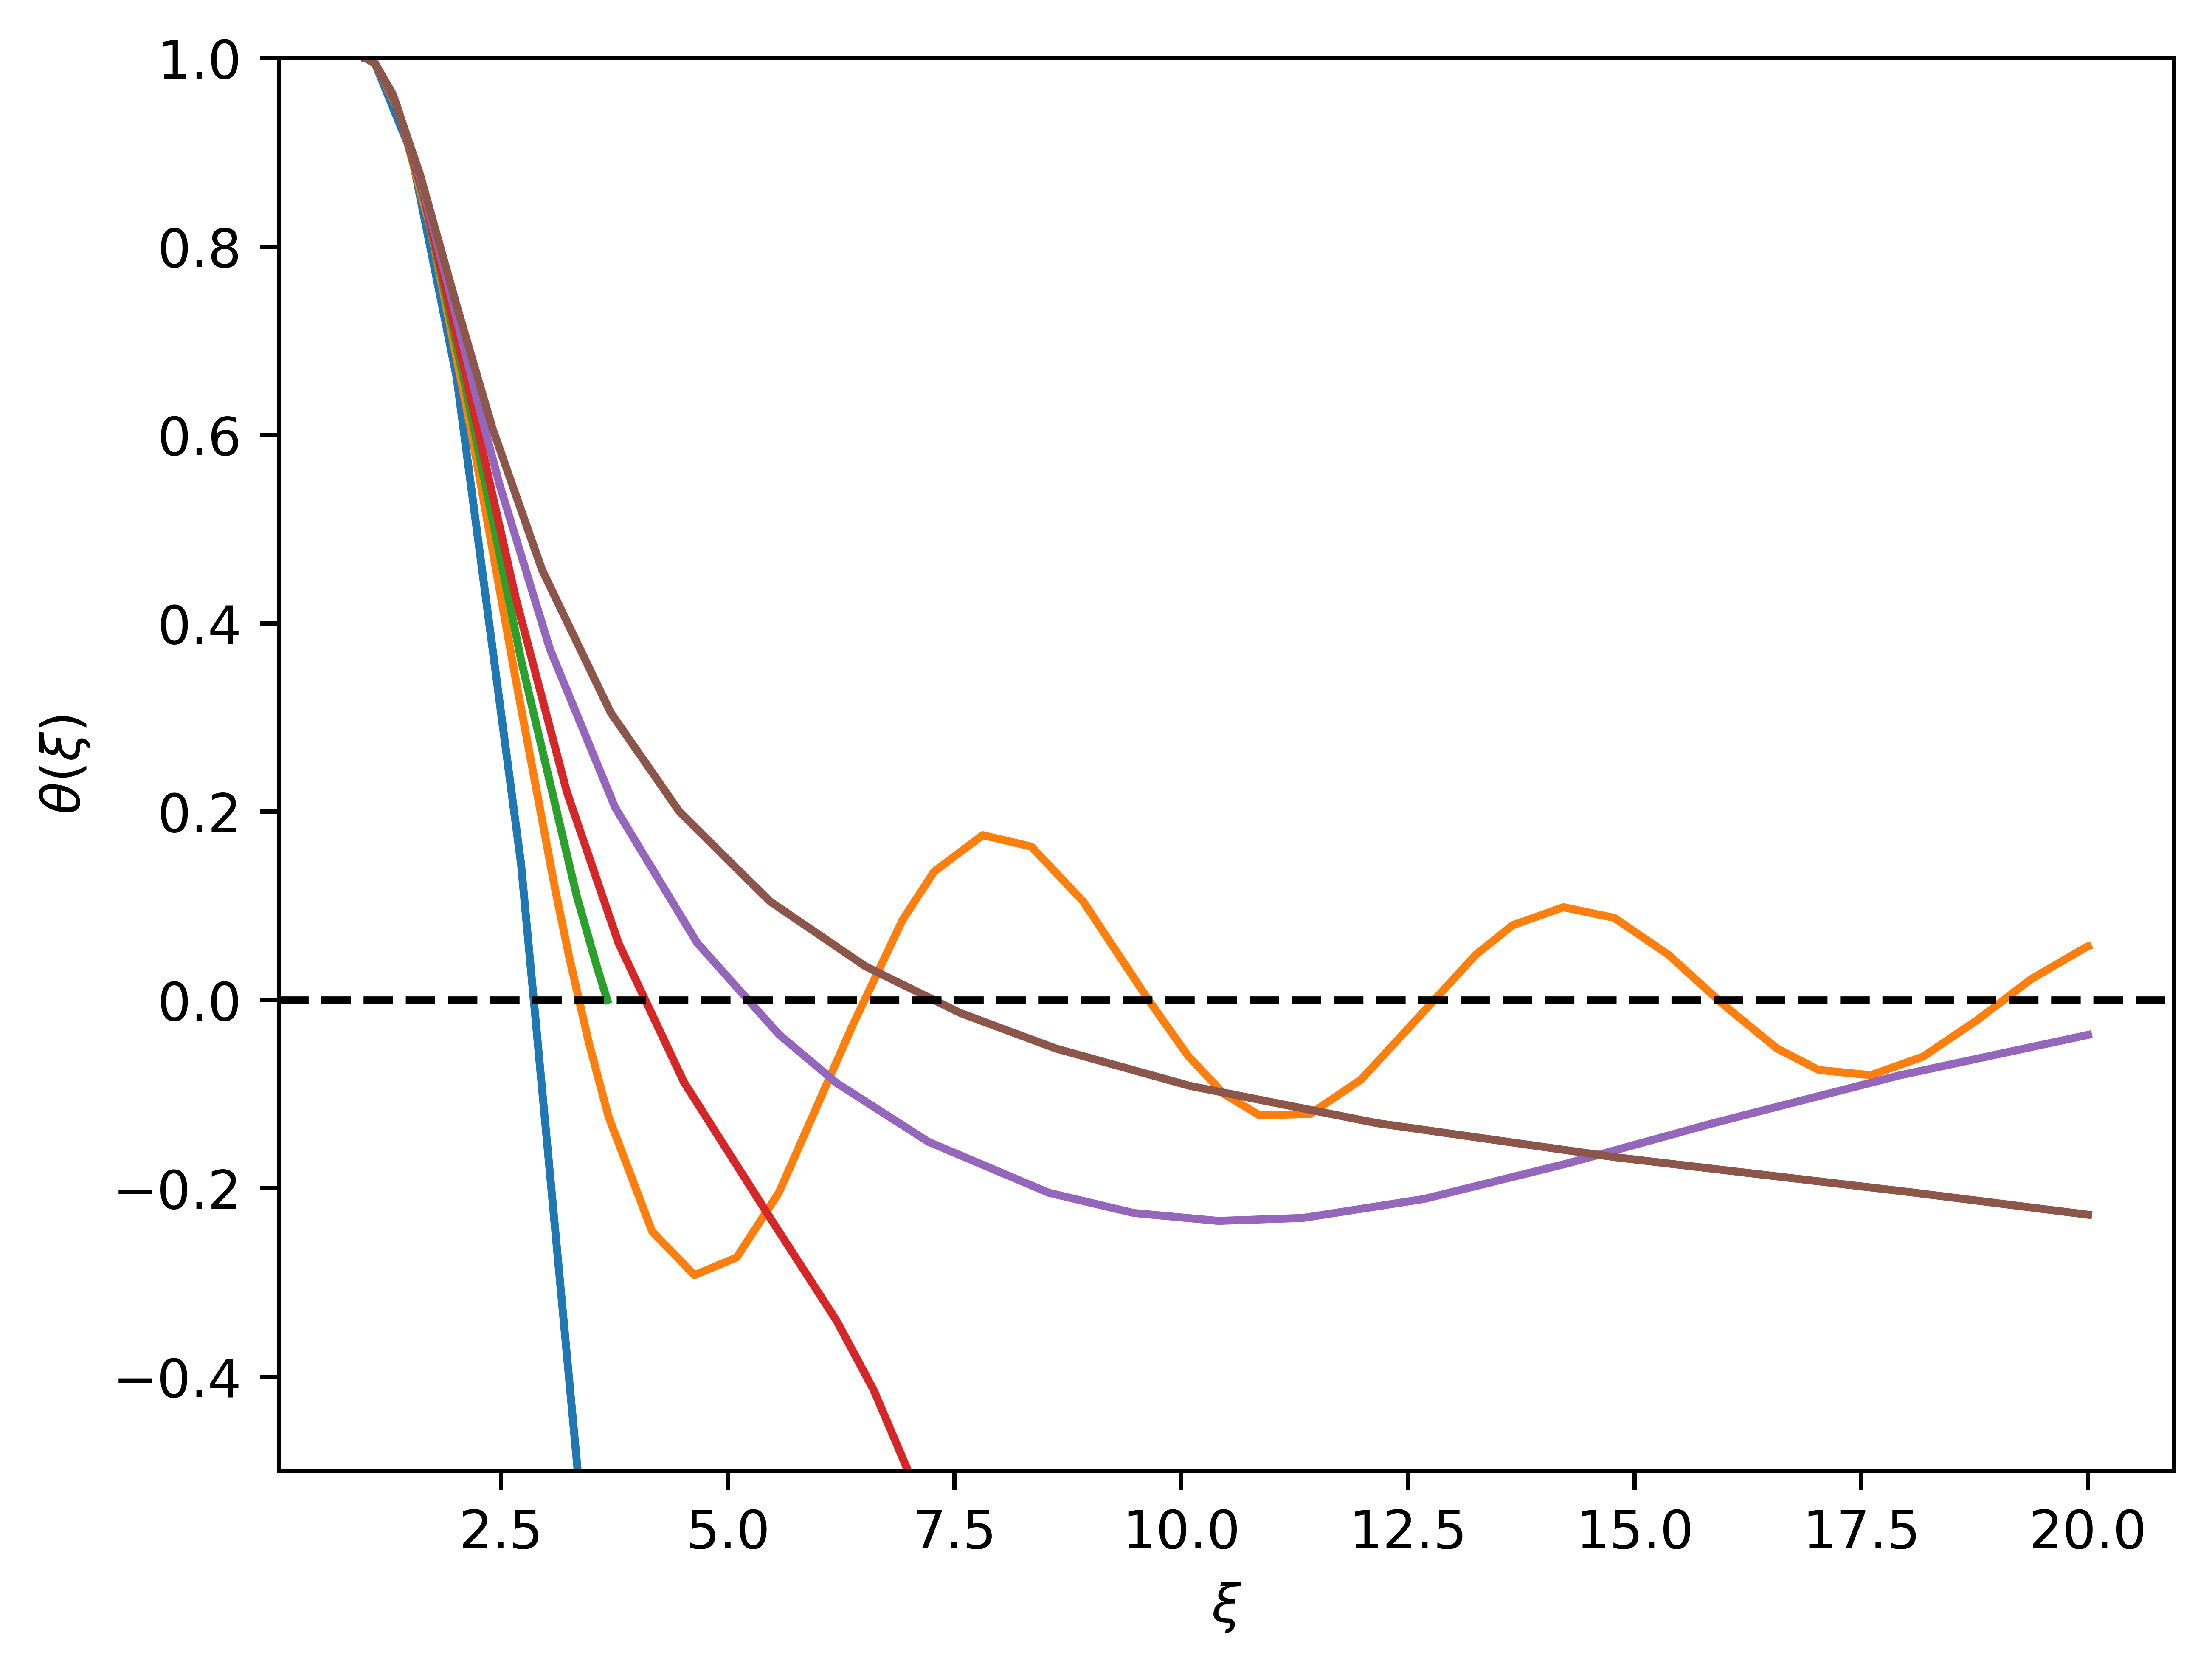

In [2]:

def deriv(t, y, n=None):

    if n is None:
        n = 3
        
    theta, phi = y
    thetadot = - phi/(t**2)
    phidot = (theta**n)*(t**2)
    return thetadot, phidot


plt.figure(dpi=900)

for i in [0,1,1.5,2,3,4]:
    f = lambda t, y: deriv(t, y, n=i)
    # Initial and final times.
    t0, tf = 1, 20
    # Initial conditions: [X] = 1; [Y] = [Z] = 0.
    y0 = 1, 0

    # Solve, using a method resilient to stiff ODEs.
    soln1 = solve_ivp(f, (t0, tf), y0, method='Radau')
    print(soln1.nfev, 'evaluations required.')


    plt.plot(soln1.t, soln1.y[0])
    

plt.axhline(0, linestyle='dashed', color='black')
plt.ylabel(r'$\theta(\xi)$')
plt.xlabel(r'$\xi$')
plt.ylim(-0.5,1)
plt.show()


# Find the first zeros, for $\Gamma=\frac{4}{3}$  

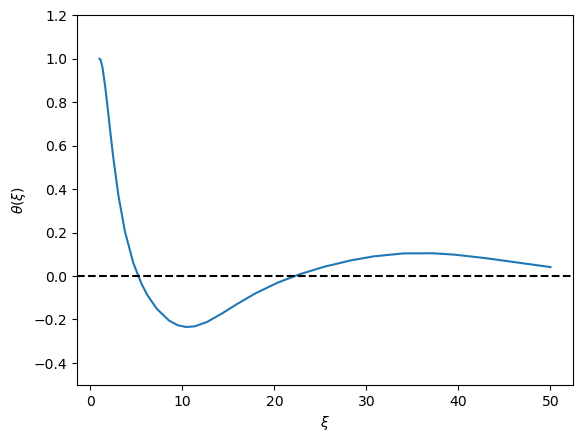

In [3]:
f = lambda t, y: deriv(t, y, n=3)
# Initial and final times.
t0, tf = 1, 50
# Initial conditions: [X] = 1; [Y] = [Z] = 0.
y0 = 1, 0

# Solve, using a method resilient to stiff ODEs.
soln1 = solve_ivp(f, (t0, tf), y0, method='Radau')
plt.plot(soln1.t, soln1.y[0])
plt.axhline(0, linestyle='dashed', color='black')
plt.ylabel(r'$\theta(\xi)$')
plt.xlabel(r'$\xi$')
plt.ylim(-0.5,1.2)

# interpolate 
from scipy.interpolate import CubicSpline

cs = CubicSpline(soln1.t, soln1.y[0])
xi_1 = cs.roots()[1]
der_at_xi1 = cs(cs.roots()[1], 1)
#print(cs.roots())
#print(cs(cs.roots()[1], 0), cs(cs.roots()[1], 1))

# Mass-radius diagram


$$
\theta : = \left[ \frac{\rho(r)}{\rho_0} \right]^{\Gamma -1} 
$$

$$
\xi : = \left[ \frac{4\pi G (\Gamma-1)}{k \Gamma} \right]^{\frac{1}{2}} \cdot \left( \rho_0^{\frac{2-\Gamma}{2}} \right) \cdot r
$$

$$
M(R) = 4\pi \left( \frac{k \Gamma}{4\pi G} \right)^{\frac{1}{2-\Gamma}}\cdot \xi_1^{\frac{\Gamma}{2-\Gamma}} \cdot \Biggr| \frac{d\theta}{dr} (\xi_1) \Biggr| \cdot R^{\frac{3\Gamma -4}{\Gamma-2}}
$$


$$\Biggr| \frac{d\theta}{dr} \Biggr|_{\xi=\xi_1} \rightarrow
\Biggr|\frac{d\theta}{d\xi} \frac{d\xi}{dr}\Biggr|_{\xi=\xi_1} = \left[ \frac{4\pi G (\Gamma-1)}{k \Gamma} \right]^{\frac{1}{2}} \cdot \left( \rho_0^{\frac{2-\Gamma}{2}} \right) \cdot \Biggr|\frac{d\theta}{d\xi} \Biggr|_{\xi=\xi_1} $$

In [4]:
rho0 = 1e13 #kg/m^3
f_piG = 4*np.pi*7e-11 #m^3/kg*s^2


def f(R, k, gamma):
    f1 = 4*np.pi * ( (k*gamma)/(f_piG) )**( (1)/(2-gamma) ) * (xi_1)**( (gamma)/(2-gamma) )
    f2 = np.sqrt(f_piG*(gamma-1)/(k*gamma)) * (rho0**(0.5*(2-gamma))) * np.abs(der_at_xi1)
    f3 = R**( (3*gamma - 4)/(gamma-2) )
    return f1*f2*f3



- http://personal.psu.edu/rbc3/A534/lec16.pdf , page3, $k=10^{15}$
- http://chimera.roma1.infn.it/OMAR/dottorato/main_v1.pdf, page 10. ionized helium $Y_e=0.5$, or plasma of iron nuclei $Y_e=0.464$ 

$$ P = \frac{8}{15} \frac{\pi m_e}{\lambda_e^3} \left(\frac{3 \pi^2 Y_e}{m_p}\right)^{\frac{5}{3}} \rho^{\frac{5}{3}}$$

$$ P = \frac{2}{3} \frac{\pi m_e}{\lambda_e^3} \left(\frac{3 \pi^2 Y_e}{m_p}\right)^{\frac{4}{3}} \rho^{\frac{4}{3}}$$

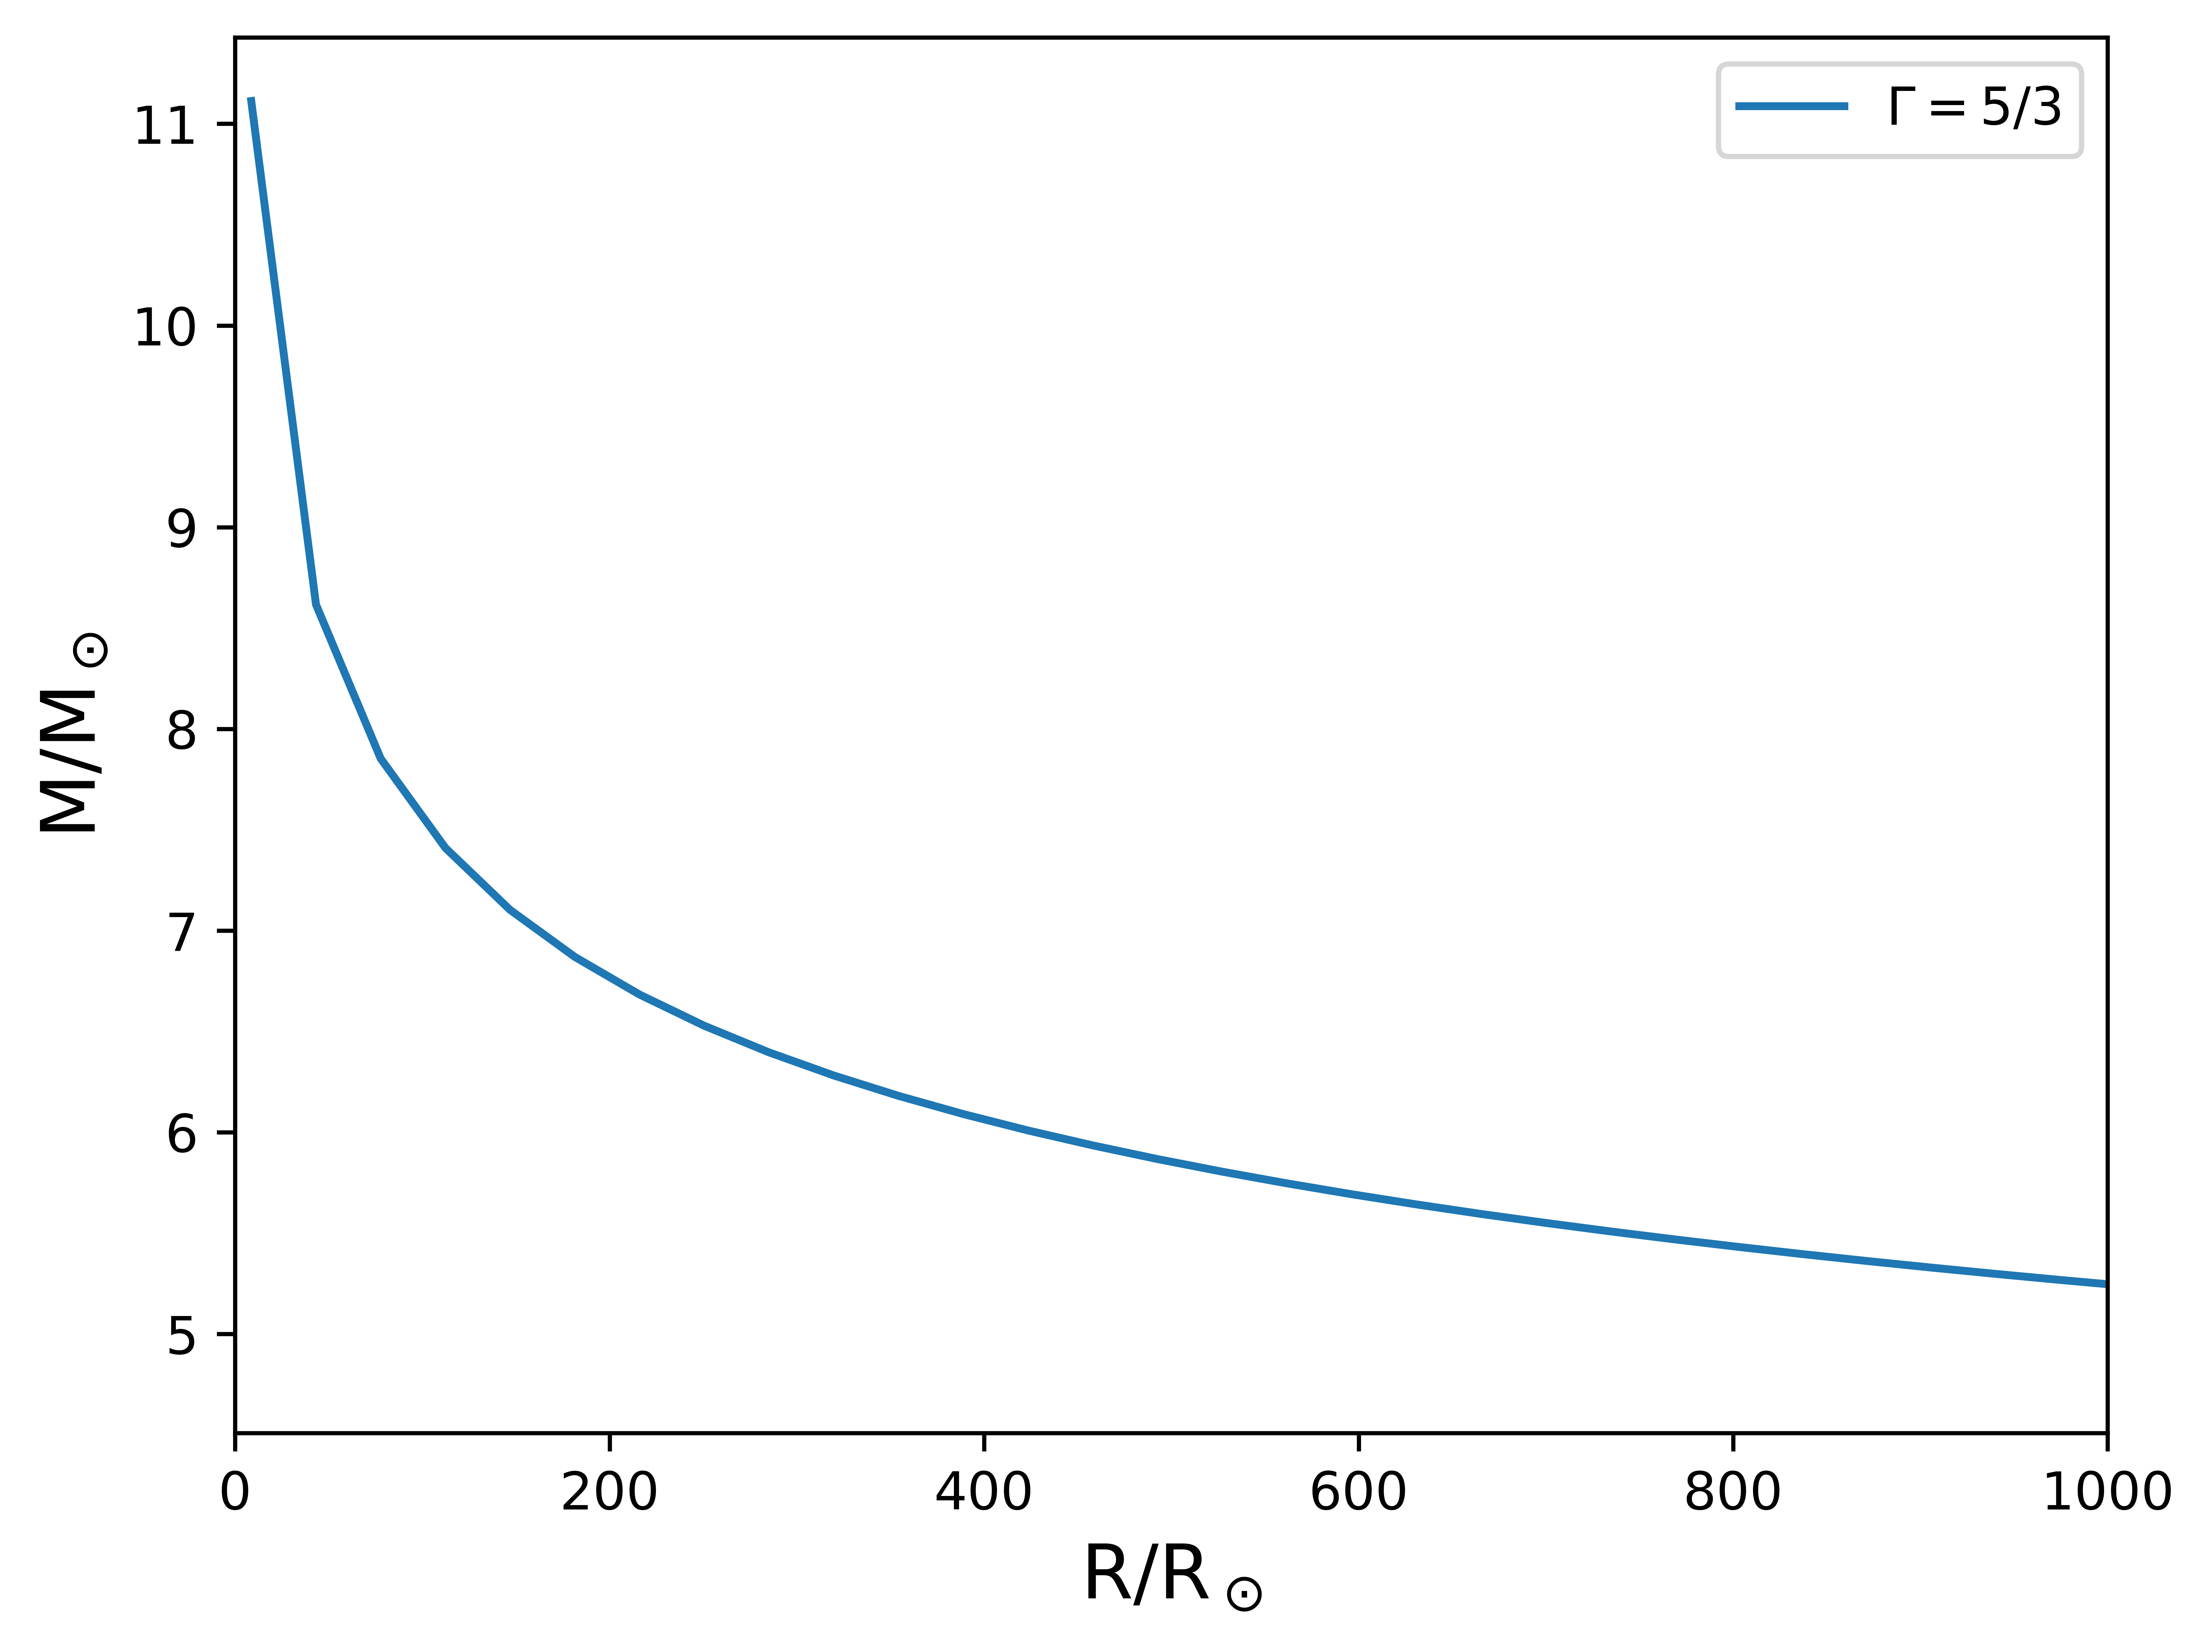

In [6]:
r = np.linspace(6e6,1.7*697e6)
f1 = lambda r: f(r, 5e15, 4.1/3) 
m = np.array(list(map(f1, r)))
plt.figure(dpi=1200)
plt.plot(r/(696e3), m/(1.98e30) , label=r'$\Gamma=5/3$')
plt.xlim(0,1000)
plt.xlabel(r'$\mathrm{R/R_\odot}$', fontsize='x-large')
plt.ylabel(r'$\mathrm{M/M_\odot}$', fontsize='x-large')
plt.legend(fontsize='medium')

plt.savefig('../images/polytrope_own.pdf')